In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [253]:
def get_x_y_from_csv(x_csv, y_csv):
    return pd.read_csv(x_csv).to_numpy(), pd.read_csv(y_csv).to_numpy().reshape(-1,)

X_train, y_train = get_x_y_from_csv("x_train.csv", "y_train.csv")

In [7]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

In [48]:
def compute_model_output(X, w, b):
    # print(f"model output shape: {sigmoid((np.dot(X, w) + b)).shape}")
    return sigmoid((np.dot(X, w) + b))

In [52]:
def compute_cost(X, w, b, y_target, lambda_):
    f_wb = compute_model_output(X, w, b)
    loss = -y_target*np.log(f_wb) - (1 - y_target) * np.log(1 - f_wb) + (lambda_ / (2 * len(X))) * np.sum(w ** 2)
    return np.mean(loss)

In [45]:
def compute_gradient(X, y_target, w, b, lambda_):
    # print(f"model output dot x shape: {np.dot((compute_model_output(X, w, b) - y_target), X).shape}")
    dj_dw = (np.dot((compute_model_output(X, w, b) - y_target), X) / len(X)) + ((lambda_ / len(X)) * w)
    # print(f"dj_dw shape: {dj_dw.shape}")
    dj_db = np.mean((compute_model_output(X, w, b) - y_target))
    return (dj_dw, dj_db)

In [50]:
def compute_gradient_descent(X, y_target, alpha, lambda_, iterations):
    w = np.zeros(X.shape[1])
    # print(f"x shape: {X.shape}")
    b = 0
    cost_history = []
    for _ in range(iterations):
        # print(f"gradients: {compute_gradient(X, y_target, w, b, lambda_)}")
        dj_dw, dj_db = compute_gradient(X, y_target, w, b, lambda_)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost_history.append(compute_cost(X, w, b, y_target, lambda_))
    # Graph the learning curve
    plt.plot(np.arange(iterations), cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('J(w,b)')
    plt.title('Learning Curve')
    plt.show()
    return w, b

In [13]:
def get_scaled_matrix(X):
    mean_x = np.mean(X, axis=0)
    std_x = np.std(X, axis=0)
    scaled_X = (X - mean_x) / std_x
    return scaled_X

In [240]:
delta_X_train = pd.read_csv("stat_delta_x_train.csv").to_numpy()

In [254]:
X_val, y_val = get_x_y_from_csv("x_val_set.csv", "y_val_set.csv")

In [255]:
delta_X_val = pd.read_csv("stat_delta_x_val.csv").to_numpy()

In [261]:
def train_log_regression(X):
    lambda_ = 2
    iterations = 500
    alpha = 0.05
    w, b = compute_gradient_descent(get_scaled_matrix(X), y_train, alpha, lambda_, iterations)
    return w, b

In [272]:
def print_evaluation(y_test, y_pred):
    print('----------------------------------')

    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    
    print('----------------------------------')
    confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(confusionMatrix)

In [276]:
def test_model(X, y_test):
    y_pred = compute_model_output(get_scaled_matrix(X), w, b)
    y_pred = y_pred.round()
    print_evaluation(y_test, y_pred)


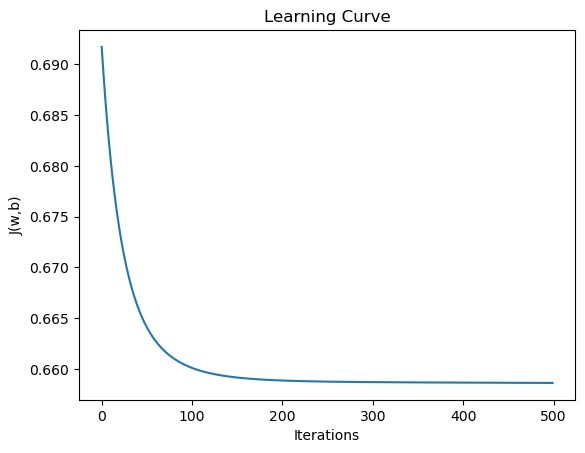

In [277]:
w, b = train_log_regression(delta_X_train)

In [278]:
test_model(delta_X_val, y_val)

----------------------------------
Accuracy: 0.6374795417348609
Precision: 0.6451990632318502
Recall: 0.7973950795947902
----------------------------------
Confusion Matrix:
[[228 303]
 [140 551]]


In [279]:
# Use sklearn to test and compare my model
logreg = LogisticRegression()

logreg.fit(get_scaled_matrix(delta_X_train), y_train)

sk_y_pred = logreg.predict(get_scaled_matrix(delta_X_val))

In [280]:
print_evaluation(y_val, sk_y_pred)

----------------------------------
Accuracy: 0.6358428805237316
Precision: 0.6443661971830986
Recall: 0.7945007235890015
----------------------------------
Confusion Matrix:
[[228 303]
 [142 549]]


In [281]:
np.count_nonzero((my_y_pred.round() == y_val).astype(int)) / y_val.shape[0]

np.float64(0.6374795417348609)